# 1.导入MySQL数据

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
con = pymysql.connect(host='localhost', user='root',password='',db='doubandb',charset='utf8')

In [3]:
sql = 'select title,author,press,substr(imprint,1,4) as imprint,pages,price,isbn,score,number from books'
data = pd.read_sql(sql, con)
con.close()

In [4]:
import datetime
# 为每本书籍添加数量
data['booknm'] = 1
data.head()

,title,author,press,imprint,pages,price,isbn,score,number,booknm
0,游泳技巧图解,高桥雄介、吉村丰,北京体育大学出版社,2001,223,20.0,9787810514156,8.4,42.0,1
1,昆虫记,\n [法]\n J·H·法布尔,作家出版社,2004,352,19.0,9787506312820,8.6,4747.0,1
2,末代皇帝的后半生,\n 贾英华,人民文学出版社,2004,454,24.0,9787020045891,6.6,66.0,1
3,电视人,\n [日]\n 村上春树,上海译文出版社,2002,134,12.0,9787532729951,7.7,3630.0,1
4,纳尼亚王国传奇（全7册）,[英] 刘易斯 著、贝恩斯 图,译林出版社,2001,1246,69.5,9787806572511,8.6,734.0,1


# 2.数据清洗 

In [5]:
data =data.dropna(how='all')
data

,title,author,press,imprint,pages,price,isbn,score,number,booknm
0,游泳技巧图解,高桥雄介、吉村丰,北京体育大学出版社,2001,223,20.0,9787810514156,8.4,42.0,1
1,昆虫记,\n [法]\n J·H·法布尔,作家出版社,2004,352,19.0,9787506312820,8.6,4747.0,1
2,末代皇帝的后半生,\n 贾英华,人民文学出版社,2004,454,24.0,9787020045891,6.6,66.0,1
3,电视人,\n [日]\n 村上春树,上海译文出版社,2002,134,12.0,9787532729951,7.7,3630.0,1
4,纳尼亚王国传奇（全7册）,[英] 刘易斯 著、贝恩斯 图,译林出版社,2001,1246,69.5,9787806572511,8.6,734.0,1
5,体验与诗,(德国)威廉·狄尔泰,生活·读书·新知三联书店,2003,390,22.5,9787108019141,8.2,95.0,1
6,张爱玲典藏全集--散文卷一：1939～1947年作品,\n 张爱玲,哈尔滨出版社,2003,150,10.8,9787806990285,8.8,786.0,1
7,嚎叫,\n [美]\n 艾伦·金斯堡,四川文艺出版社,2001,256,18.0,9787541119606,8.6,1211.0,1
8,回忆大哥鲁迅,周建人,上海教育出版社,2001,240,15.5,9787532075966,,NaN,1
9,旋转木马鏖战记,\n [日]\n 村上春树,上海译文出版社,2002,133,12.0,9787532729210,7.9,3714.0,1


In [6]:
data.isnull().sum()

title        0
author       0
press        0
imprint      0
pages        0
price        0
isbn         5
score        0
number     897
booknm       0
dtype: int64

In [7]:
data.dtypes

title       object
author      object
press       object
imprint     object
pages        int64
price      float64
isbn        object
score       object
number     float64
booknm       int64
dtype: object

In [8]:
data=data.dropna(subset=['imprint','price','press','author','number','score'])
# 将score转为浮点型数据
data[['score']]=data[['score']].astype(float)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [9]:
data.head()

,title,author,press,imprint,pages,price,isbn,score,number,booknm
0,游泳技巧图解,高桥雄介、吉村丰,北京体育大学出版社,2001,223,20.0,9787810514156,8.4,42.0,1
1,昆虫记,\n [法]\n J·H·法布尔,作家出版社,2004,352,19.0,9787506312820,8.6,4747.0,1
2,末代皇帝的后半生,\n 贾英华,人民文学出版社,2004,454,24.0,9787020045891,6.6,66.0,1
3,电视人,\n [日]\n 村上春树,上海译文出版社,2002,134,12.0,9787532729951,7.7,3630.0,1
4,纳尼亚王国传奇（全7册）,[英] 刘易斯 著、贝恩斯 图,译林出版社,2001,1246,69.5,9787806572511,8.6,734.0,1


In [10]:
# 先删除价格里的异常值
price_upper=data['price'].quantile(0.75)
price_lower=data['price'].quantile(0.25)
price_val=price_upper-price_lower
k = 3
data2=data.drop(data[data['price']>price_upper+k*price_val].index) 

# 3.分析书的数量与年份的关系 

In [23]:
data1 = data.set_index('imprint')
data8=data1.groupby(data1.index).sum()
data8 = data8.drop(['10月2','8月20'])
data9 = data8.iloc[1:62]
data9
# data1=data1.drop(index=[' 10 N',' 15 M',' June',' Nove'])

,pages,price,score,number,booknm
imprint,,,,,
1900,721,79.80,27.6,1855.0,4
1905,272,140.00,9.0,1146.0,1
1920,414,5.23,8.8,53.0,1
1952,278,10.70,8.1,350.0,1
1953,386,13.90,8.2,13664.0,1
1955,892,76.00,9.3,96.0,1
1958,6005,1035.40,41.9,6507.0,5
1959,1866,76.50,36.2,1442.0,4
1961,158,7.80,8.6,281.0,1


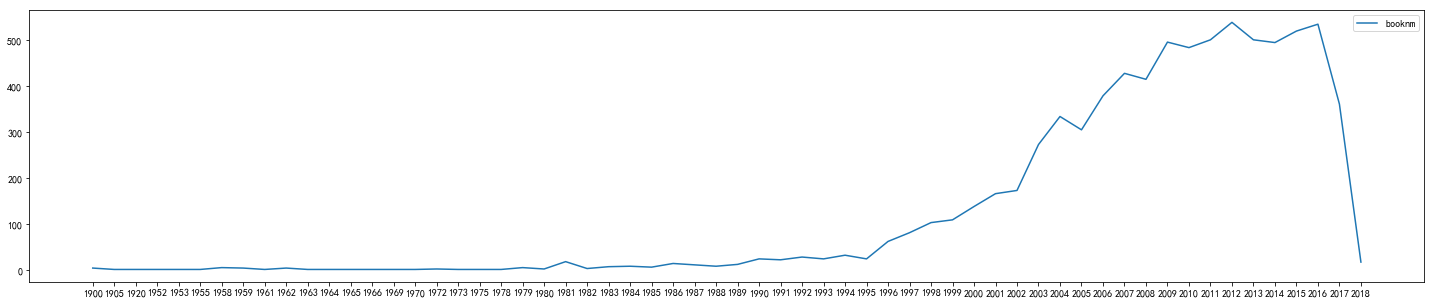

In [27]:
plt.rcParams['figure.figsize'] = (25.0, 5.0)
plt.plot(data9.index,data9['booknm'])
plt.legend()
plt.show()

# 4.分析书籍的评分与年代之间是否有某种关系 

In [30]:
data10=data1.groupby(data1.index).mean()
data10 = data10.drop(['10月2','8月20'])
data10 = data10.iloc[1:62]
data10

,pages,price,score,number,booknm
imprint,,,,,
1900,180.250000,19.950000,6.900000,463.750000,1.0
1905,272.000000,140.000000,9.000000,1146.000000,1.0
1920,414.000000,5.230000,8.800000,53.000000,1.0
1952,278.000000,10.700000,8.100000,350.000000,1.0
1953,386.000000,13.900000,8.200000,13664.000000,1.0
1955,892.000000,76.000000,9.300000,96.000000,1.0
1958,1201.000000,207.080000,8.380000,1301.400000,1.0
1959,466.500000,19.125000,9.050000,360.500000,1.0
1961,158.000000,7.800000,8.600000,281.000000,1.0


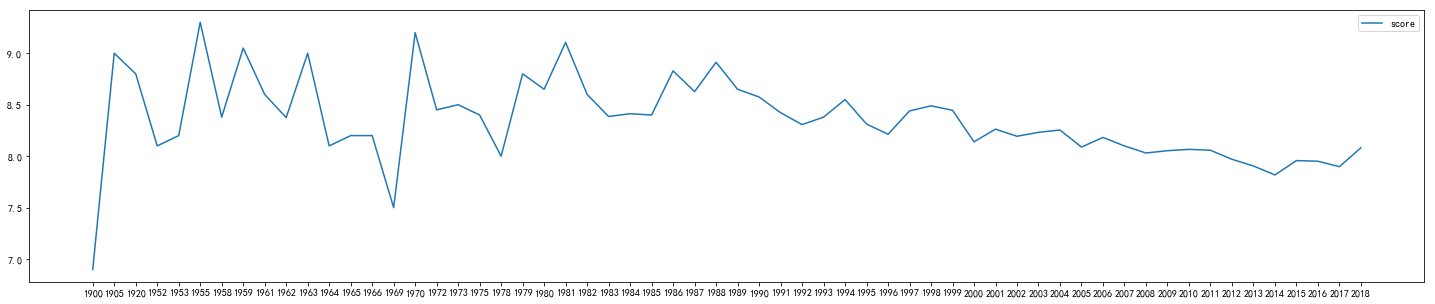

In [31]:
plt.rcParams['figure.figsize'] = (25.0, 5.0)
plt.plot(data10.index,data10['score'])
plt.legend()
plt.show()

# 5.价格的范围 

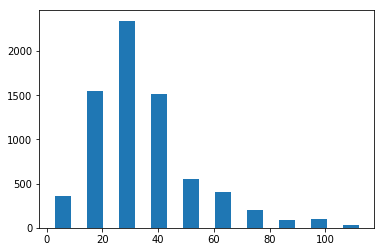

In [12]:
plt.hist(data2['price'],rwidth=0.5)
plt.rcParams['figure.figsize'] = (10.0, 4.0)
plt.show()

# 6.出版的书籍最多的前20个出版社


In [13]:
data3 = data.drop(data[data['press']==''].index)
data4 = data3.groupby(data3['press']).sum()
data4 = data4.sort_values(by='booknm',ascending=False)
data4 = data4.head(20)
data4[data4.columns[-1:]]
# data3.dtypes

,booknm
press,
人民文学出版社,332
新星出版社,193
上海译文出版社,188
中信出版社,160
中华书局,145
译林出版社,141
生活·读书·新知三联书店,137
广西师范大学出版社,129
南海出版公司,118


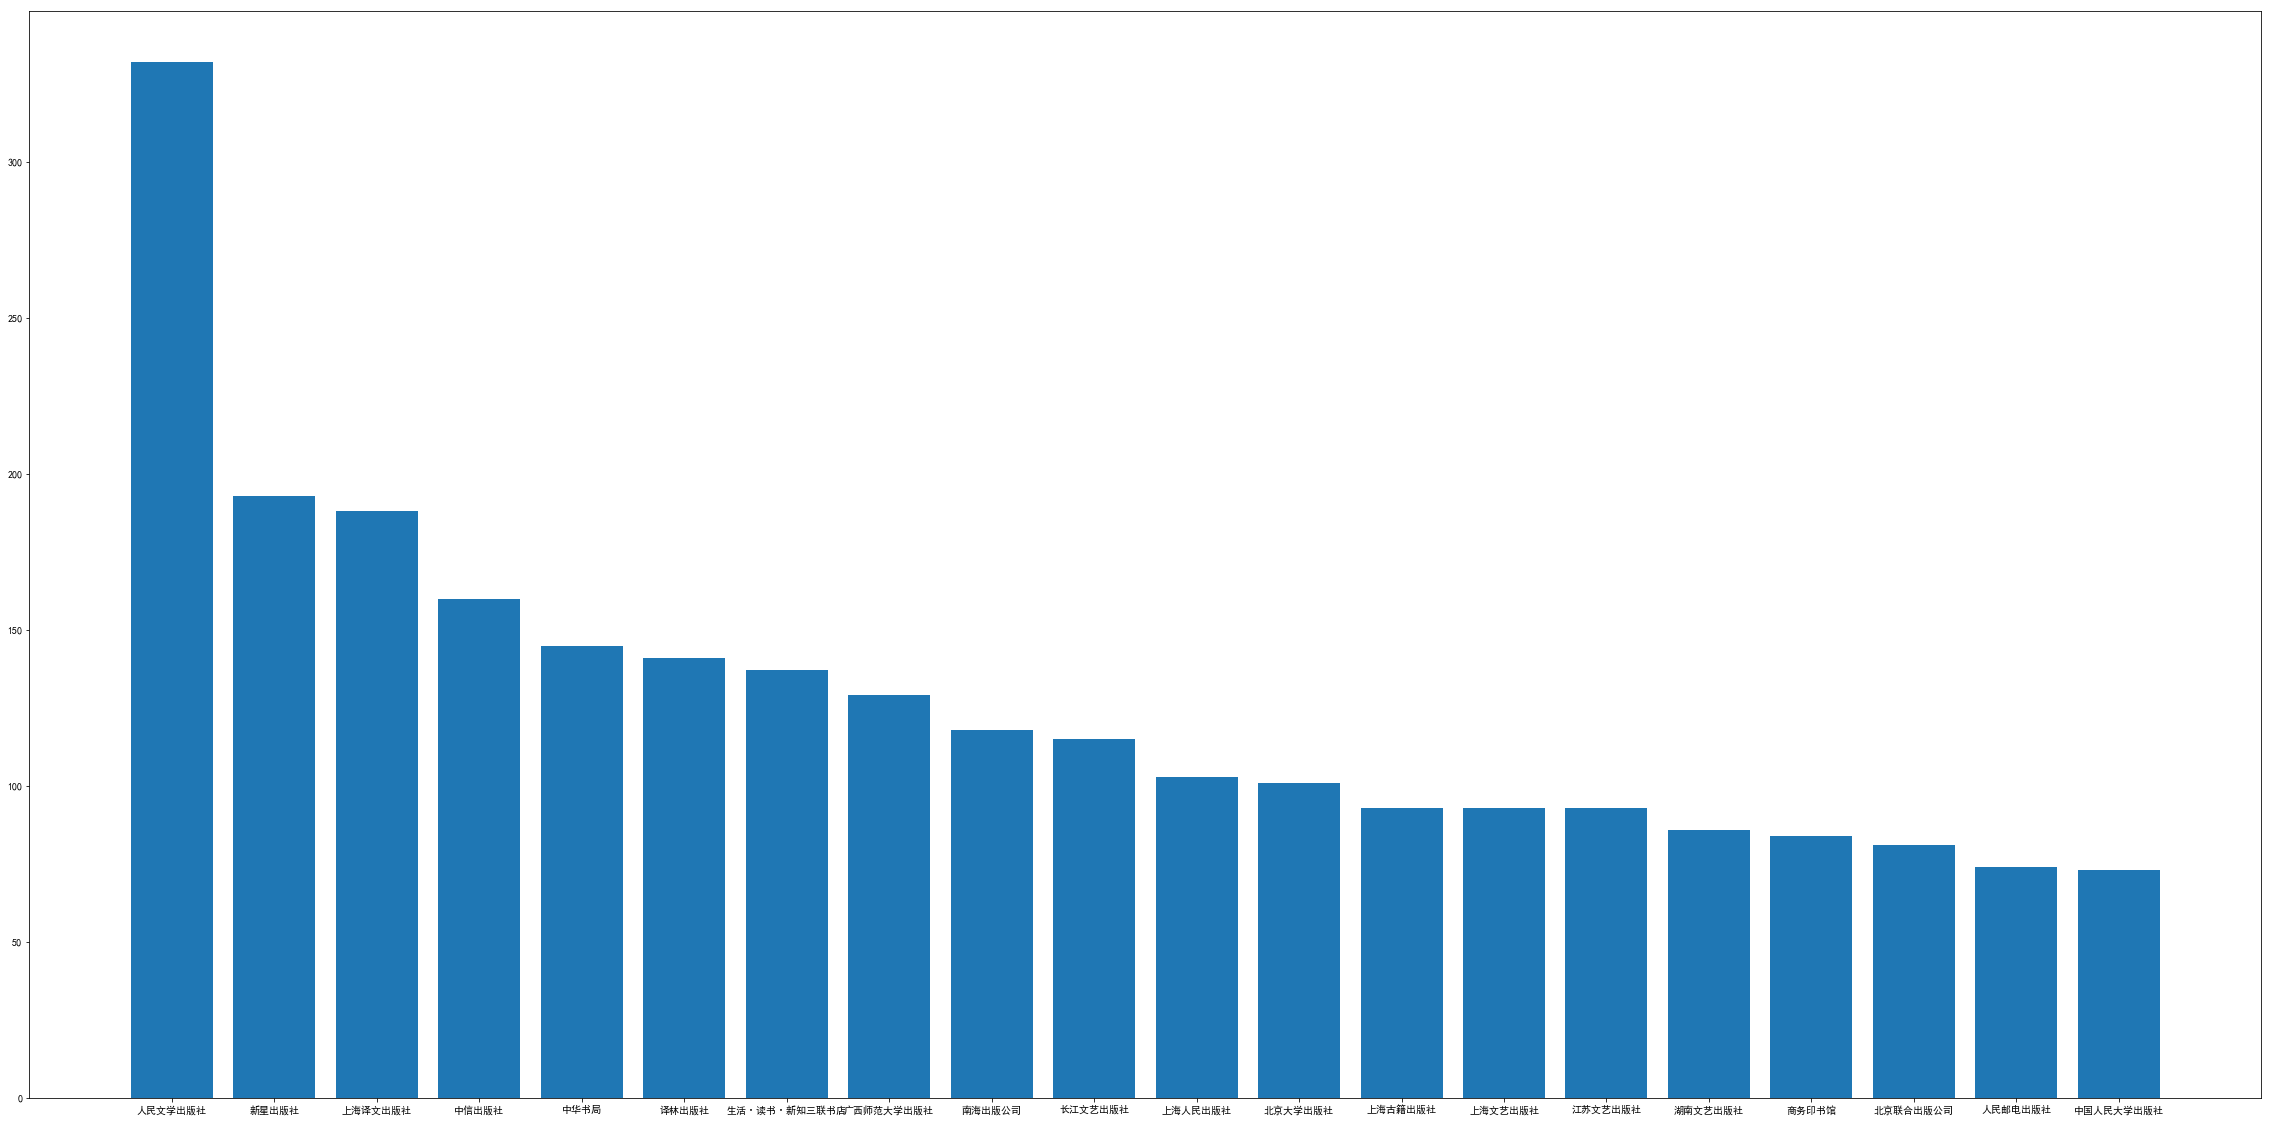

In [14]:
plt.rc('font',**{'family':"Microsoft YaHei, SimHei"})
plt.figure(figsize=(40,20))
plt.bar(data4.index, data4['booknm'],)
plt.show()


# 7.书籍评分比较高出版社

In [15]:
data4 = data3.groupby(data3['press']).mean()
data4 = data4.sort_values(by='score',ascending=False)
data5 = data4.head(10)
data5

,pages,price,score,number,booknm
press,,,,,
HarperCollins,540.0,75.00,10.0,112.0,1.0
Harvard University Press,160.0,19.95,10.0,16.0,1.0
商務印書館(香港)有限公司,90.0,42.00,9.9,81.0,1.0
Race Point Publishing,1112.0,35.00,9.9,17.0,1.0
Ecco,208.0,15.99,9.9,19.0,1.0
Michael Neugebauer Book,136.0,49.95,9.8,28.0,1.0
"北京出版社出版集团,北京十月文艺出版社",1589.0,145.00,9.8,45.0,1.0
Bloomsbury Publishing PLC,7.0,115.00,9.8,33.0,1.0
更新传道会,1400.0,1900.00,9.8,33.0,1.0


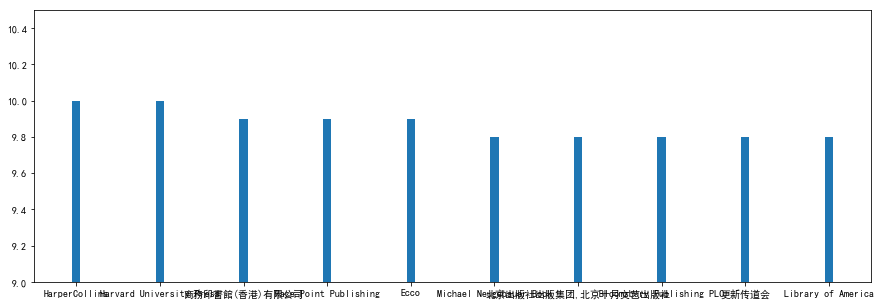

In [16]:
plt.figure(figsize=(15,5))
plt.ylim(9.0,10.5)
plt.bar(data5.index, data5['score'],width=0.1)
plt.show()

#  8.出书多的作者

In [17]:
data6 = data3.groupby(data3['author']).sum()
data6 = data6.sort_values(by='booknm',ascending=False)
data7 = data6.head(10)
data7

,pages,price,score,number,booknm
author,,,,,
\n 王小波,25597,2325.60,669.3,207240.0,77
\n 鲁迅,30562,2567.20,648.3,5594.0,73
\n 张爱玲,14680,921.40,370.3,99321.0,44
\n 余华,16643,2077.55,292.6,152225.0,37
\n [日]\n 村上春树,8181,2650.20,260.0,377281.0,33
\n 郑渊洁,6746,384.30,224.2,62832.0,26
\n [法]\n 居伊·德·莫泊桑,6076,362.25,125.1,42833.0,15
\n [加拿大]\n 叶嘉莹,4007,379.70,122.8,5051.0,14
\n 王朔,4004,203.05,94.2,34339.0,12


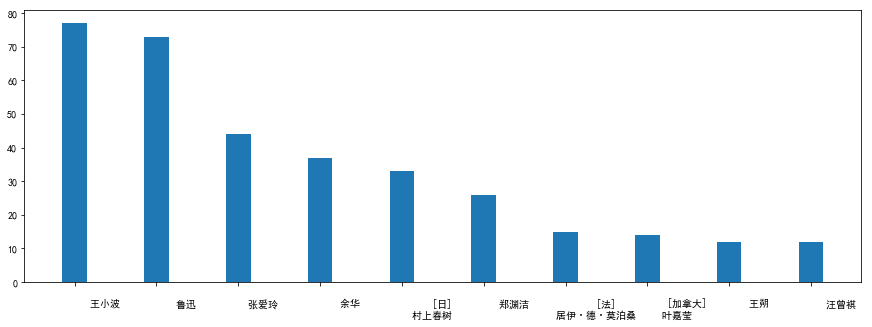

In [18]:
plt.figure(figsize=(15,5))
# plt.ylim(9.0,10.5)
plt.bar(data7.index, data7['booknm'],width=0.3)
plt.show()

#  9.评分高与评论数量这间是否存在某种关系

In [19]:
import seaborn as sns
corr = data.corr()
corr

,pages,price,score,number,booknm
pages,1.000000,0.428640,0.155605,-0.004281,NaN
price,0.428640,1.000000,0.077077,-0.020004,NaN
score,0.155605,0.077077,1.000000,0.038567,NaN
number,-0.004281,-0.020004,0.038567,1.000000,NaN
booknm,NaN,NaN,NaN,NaN,NaN


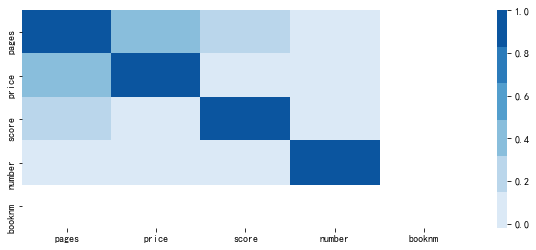

<Figure size 1080x720 with 0 Axes>

In [20]:
sns.heatmap(corr,cmap=sns.color_palette('Blues'))
plt.figure(figsize=(15,10))
plt.show()

In [21]:
import numpy as np
mask =np.zeros_like(corr,dtype=np.bool)
ind = np.triu_indices_from(mask)
mask[ind] = True
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

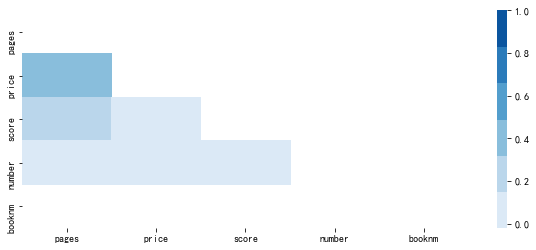

<Figure size 1080x720 with 0 Axes>

In [22]:
sns.heatmap(corr,cmap=sns.color_palette('Blues'), mask=mask)
plt.figure(figsize=(15,10))
plt.show()

##  可以看出评分（score）高与评论数量（number）之间是几乎不存在某种关系，而页数和价格存在较强的联系。页数越多，一般价格也就会越贵，符合实际情况。